In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [12]:
penguins_df = pd.read_csv('penguins.csv')
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [18]:
penguins_df =  pd.get_dummies(penguins_df)

In [19]:
scaler = StandardScaler()
penguins_df_scaled = scaler.fit_transform(penguins_df)

In [20]:
inertia = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters=i , random_state=42)
    kmeans.fit(penguins_df_scaled)
    inertia.append(kmeans.inertia_)

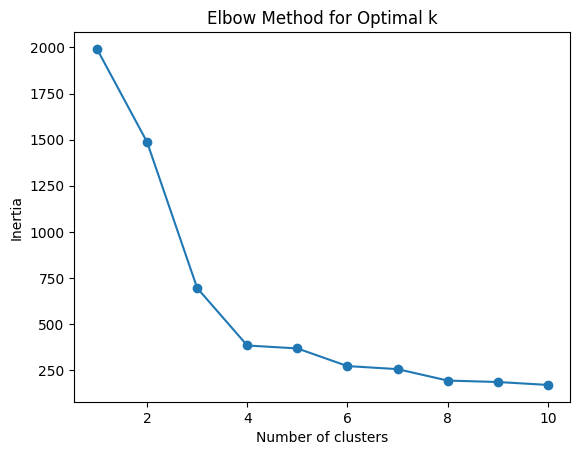

In [21]:
plt.plot(range(1 , 11) , inertia , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

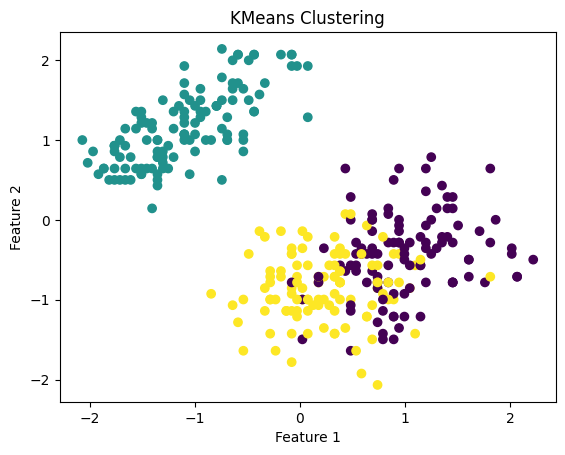

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_df_scaled)
plt.scatter(penguins_df_scaled[:,1] , penguins_df_scaled[:,2], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [30]:
numeric_columns = penguins_df[['culmen_length_mm' , 'culmen_depth_mm' , 'flipper_length_mm' , 'body_mass_g']]
numeric_columns

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
327,47.2,13.7,214.0,4925.0
328,46.8,14.3,215.0,4850.0
329,50.4,15.7,222.0,5750.0
330,45.2,14.8,212.0,5200.0


In [31]:
numeric_columns['label'] = kmeans.labels_

C:\Users\Ahmed Mohamed\AppData\Local\Temp\ipykernel_18980\3875269916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['label'] = kmeans.labels_


In [32]:
numeric_columns

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,2
2,40.3,18.0,195.0,3250.0,2
3,36.7,19.3,193.0,3450.0,2
4,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1
328,46.8,14.3,215.0,4850.0,1
329,50.4,15.7,222.0,5750.0,1
330,45.2,14.8,212.0,5200.0,1


In [33]:
stat_penguins = numeric_columns.groupby('label').mean()

In [34]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,47.568067,14.996639,217.235294,5092.436975
2,40.217757,17.611215,189.046729,3419.158879
